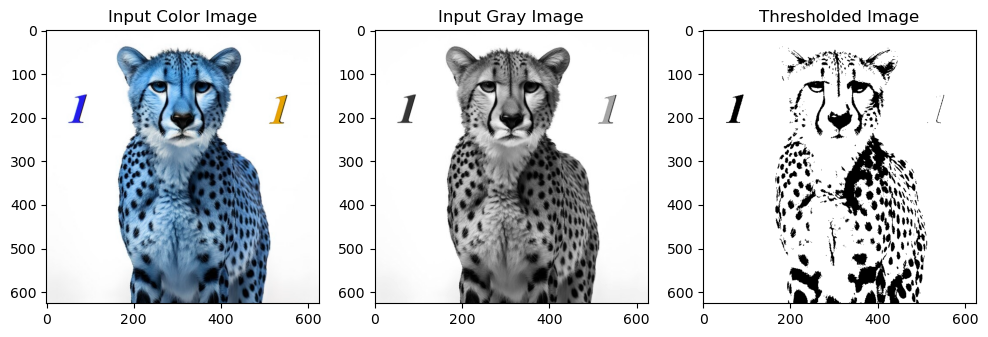

In [178]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
image = cv2.imread('E:/IUT/Computer vision/EX4/1.jpg', cv2.IMREAD_ANYCOLOR) # Read the input image
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Convert the image to gray scale
threshold_value = 73 # Apply thresholding
max_value = 255
_, thresholded_image = cv2.threshold(image_gray, threshold_value, max_value, cv2.THRESH_BINARY)
fig, axs = plt.subplots(1, 3, figsize=(10, 4)) # Create a figure with multiple subplots
axs[0].imshow(image) # Plot the input image
axs[0].set_title('Input Color Image')
axs[2].imshow(thresholded_image, cmap='gray') # Plot the thresholded image
axs[2].set_title('Thresholded Image')
axs[1].imshow(image_gray, cmap='gray')
axs[1].set_title('Input Gray Image')
plt.tight_layout() # Adjust spacing between subplots
plt.show() # Display the figure

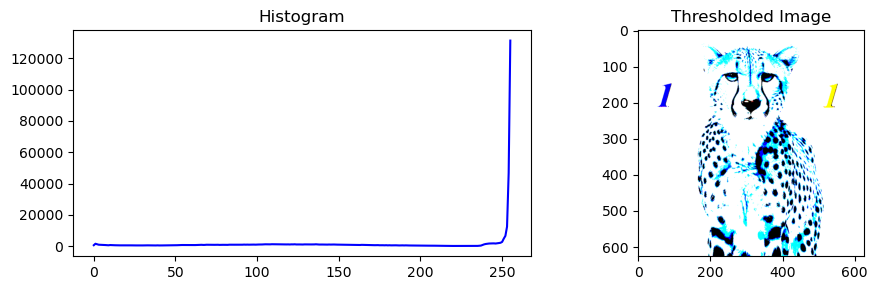

In [154]:
histogram, bins = np.histogram(image_gray.flatten(), bins=256, range=[0, 256]) # Calculate the histogram of the image
peaks, _ = find_peaks(histogram, distance=10, prominence=355) # Find the peaks in the histogram
peaks = peaks[np.argsort(-histogram[peaks])][:2] # Select the two highest peaks
threshold_value = int(np.mean(peaks)) # Determine the threshold value
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY) # Apply thresholding to the image
plt.figure(figsize=(10, 3)) # Plot the histogram and the thresholded image
plt.subplot(1, 2, 1) # Plot the histogram
plt.plot(histogram, color='blue')
plt.title('Histogram')
plt.subplot(1, 2, 2) # Plot the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.tight_layout()
plt.show()

In [155]:
highest_peak_index = np.argmax(histogram) #calculating Antimode value
antimode_index = np.argsort(-histogram)[1]
antimode_value = bins[antimode_index]
print("Antimode Point:", antimode_value)

Antimode Point: 254.0


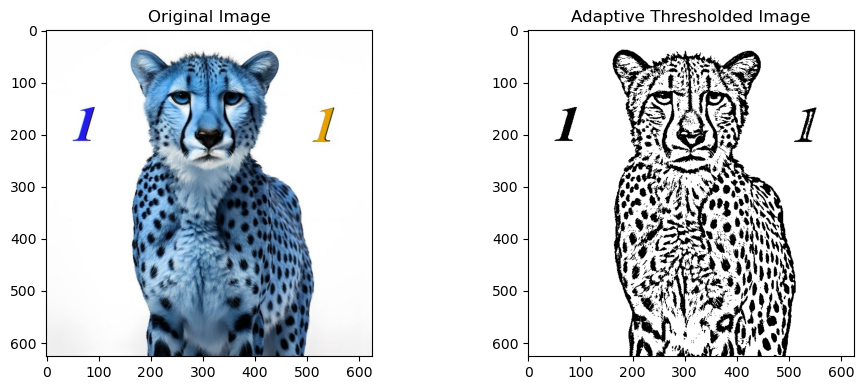

In [156]:
max_value = 255 # Apply adaptive thresholding
block_size = 17 # Size of the neighborhood for thresholding
C = 5  # Constant subtracted from the mean or weighted mean
thresholded_image = cv2.adaptiveThreshold(image_gray, max_value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
plt.figure(figsize=(10, 4)) # Plot the original and thresholded images
plt.subplot(1, 2, 1) # Plot the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2) # Plot the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Adaptive Thresholded Image')
plt.tight_layout()
plt.show()

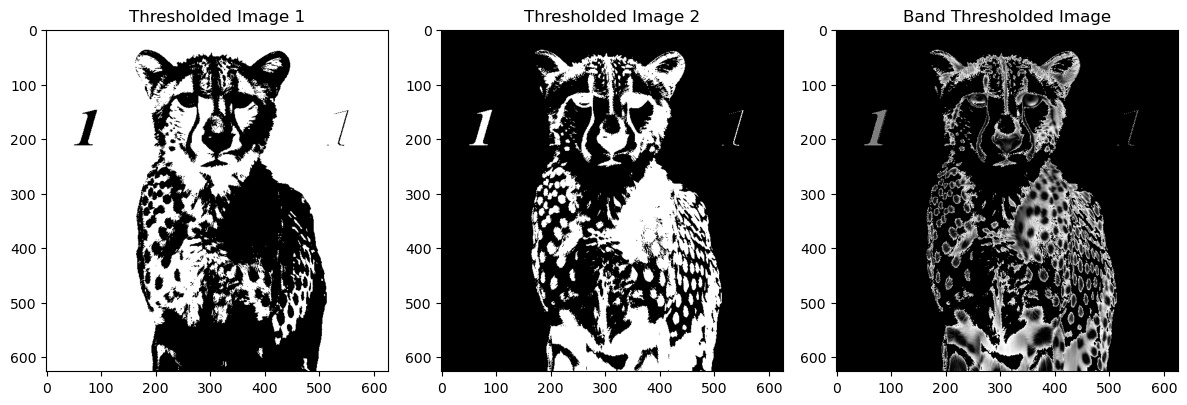

In [177]:
histogram, bins = np.histogram(image_gray.flatten(), bins=256, range=[0, 256]) # Calculate the histogram of the image
peaks, _ = find_peaks(histogram, distance=20, prominence=100) # Find the indices corresponding to the peaks in the histogram
sorted_peaks = peaks[np.argsort(-histogram[peaks])] # Sort the peaks in descending order of their frequencies
lower_threshold = sorted_peaks[-1] # Determine the lower and upper thresholds based on the peaks
upper_threshold = sorted_peaks[-2]
_, thresholded_image1 = cv2.threshold(image_gray, lower_threshold, 255, cv2.THRESH_BINARY) # Apply binary thresholding
_, thresholded_image2 = cv2.threshold(image_gray, upper_threshold, 255, cv2.THRESH_BINARY_INV)
band_thresholded_image = cv2.bitwise_and(image_gray, thresholded_image2) # Perform bitwise AND operation
plt.figure(figsize=(12, 4)) # Plot the original and thresholded images
plt.subplot(1, 3, 3) # Plot the original image
plt.imshow(band_thresholded_image, cmap='gray')
plt.title('Band Thresholded Image')
plt.subplot(1, 3, 1) # Plot the thresholded image 1
plt.imshow(thresholded_image1, cmap='gray')
plt.title('Thresholded Image 1')
plt.subplot(1, 3, 2) # Plot the thresholded image 2
plt.imshow(thresholded_image2, cmap='gray')
plt.title('Thresholded Image 2')
plt.tight_layout()
plt.show()